In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from ddeint import ddeint

# Simulation of a Single Oscillator

In [40]:
def simulate_single_system(p, q, r, s, beta, init_states, time_points):
    """
    init_states = [Y, theta_OH, theta_O]
    """
    def single_system(t, state, p, q, r, s, beta):
        Y, theta_OH, theta_O = state
        theta_OH = np.clip(theta_OH, 0, 1)
        theta_O = np.clip(theta_O, 0, 1)
        eps = 1e-8
        theta_M = 1 - theta_OH - theta_O + eps
        
        d_state = [
            p*theta_M - q*Y,
            Y*theta_M - (np.exp(-beta*theta_OH) + r)*theta_OH + 2*s*theta_O*theta_M,
            r*theta_OH - s*theta_O*theta_M
        ]
        return d_state

    sol = solve_ivp(single_system, [time_points[0], time_points[-1]], init_states, args=(p, q, r, s, beta), t_eval=time_points)
    Y, theta_OH, theta_O = sol.y
    return Y, theta_OH, theta_O

In [41]:
dt = 1
max_integration_steps = 30000
time_points = np.linspace(0, max_integration_steps*dt, max_integration_steps+1)

init_states = [0.11, 0.3, 0.1175]
delta = np.random.uniform(0, 1e-3, 3)
p, q, r, s, beta = 2e-4, 1e-3, 2e-5, 9.7e-5, 5

Y1, theta_OH1, theta_O1  = simulate_single_system(p, q, r, s, beta, init_states, time_points)
Y2, theta_OH2, theta_O2  = simulate_single_system(p, q, r, s, beta, init_states+delta, time_points)

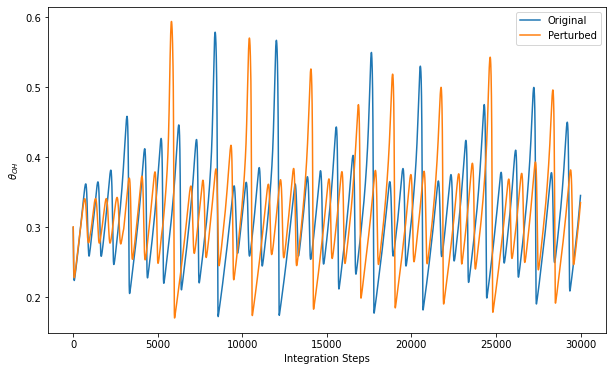

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(max_integration_steps+1), theta_OH1, label="Original")
ax.plot(np.arange(max_integration_steps+1), theta_OH2, label="Perturbed")
ax.set_xlabel('Integration Steps')
ax.set_ylabel(r'$\theta_{OH}$')
ax.legend()
plt.savefig("figures/single_oscillator_sdic.png", transparent=True, bbox_inches='tight')
plt.show()

# Chaotic Synchronisation Under Bidirectional Coupling

In [43]:
def simulate_bidirectionally_coupled_system(p, q, r, s, beta, omega_1, omega_2, epsilon, init_states, time_points):
    """
    init_states = [Y_1, Y_2, theta_OH_1, theta_OH_2, theta_O_1, theta_O_2]
    """
    def bidirectionally_coupled_system(t, state, p, q, r, s, beta, omega_1, omega_2, epsilon):
        Y_1, Y_2, theta_OH_1, theta_OH_2, theta_O_1, theta_O_2 = state
        theta_OH_1 = np.clip(theta_OH_1, 0, 1)
        theta_OH_2 = np.clip(theta_OH_2, 0, 1)
        theta_O_1 = np.clip(theta_O_1, 0, 1)
        theta_O_2 = np.clip(theta_O_2, 0, 1)
        eps = 1e-8
        theta_M_1 = 1 - theta_OH_1 - theta_O_1 + eps
        theta_M_2 = 1 - theta_OH_2 - theta_O_2 + eps

        d_state = [
            omega_1*(p*theta_M_1 - q*Y_1) + epsilon*(Y_2 - Y_1),
            omega_2*(p*theta_M_2 - q*Y_2) + epsilon*(Y_1 - Y_2),
            omega_1*(Y_1*theta_M_1 - (np.exp(-beta*theta_OH_1) + r)*theta_OH_1+ 2*s*theta_O_1*theta_M_1) + epsilon*(theta_OH_2 - theta_OH_1),
            omega_2*(Y_2*theta_M_2 - (np.exp(-beta*theta_OH_2) + r)*theta_OH_2+ 2*s*theta_O_2*theta_M_2) + epsilon*(theta_OH_1 - theta_OH_2),
            r*theta_OH_1 - s*theta_O_1*theta_M_1 + epsilon*(theta_O_2 - theta_O_1),
            r*theta_OH_2 - s*theta_O_2*theta_M_2 + epsilon*(theta_O_1 - theta_O_2)
        ]
        return d_state

    sol = solve_ivp(bidirectionally_coupled_system, [time_points[0], time_points[-1]], init_states, args=(p, q, r, s, beta, omega_1, omega_2, epsilon), t_eval=time_points)
    Y_1, Y_2, theta_OH_1, theta_OH_2, theta_O_1, theta_O_2 = sol.y
    return Y_1, Y_2, theta_OH_1, theta_OH_2, theta_O_1, theta_O_2

In [44]:
dt = 1
max_integration_steps = 30000
time_points = np.linspace(0, max_integration_steps*dt, max_integration_steps+1)

init_states = [0.110, 0.110, 0.3, 0.3, 0.1175, 0.1175]
p, q, r, s, beta, omega_1, omega_2 = 2e-4, 1e-3, 2e-5, 9.7e-5, 5, 0.83, 0.88
epsilon = 5e-7
Y_1, Y_2, theta_OH_1, theta_OH_2, theta_O_1, theta_O_2 = simulate_bidirectionally_coupled_system(p, q, r, s, beta, omega_1, omega_2, epsilon, init_states, time_points)

### Figure 2

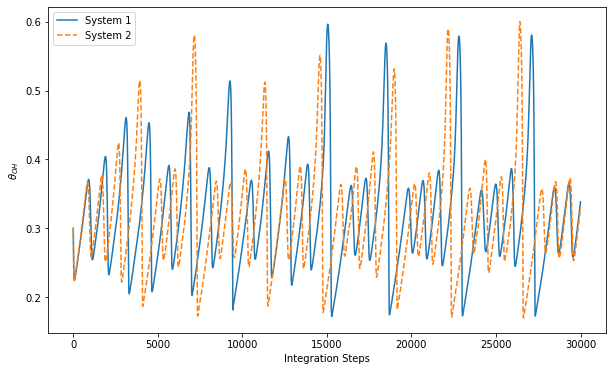

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(max_integration_steps+1), theta_OH_1, label="System 1")
ax.plot(np.arange(max_integration_steps+1), theta_OH_2, linestyle='--', label="System 2")
ax.set_xlabel('Integration Steps')
ax.set_ylabel(r'$\theta_{OH}$')
ax.legend()
plt.savefig("figures/anticipation_sync_fig2.png", transparent=True, bbox_inches='tight')
plt.show()

### Figure 3

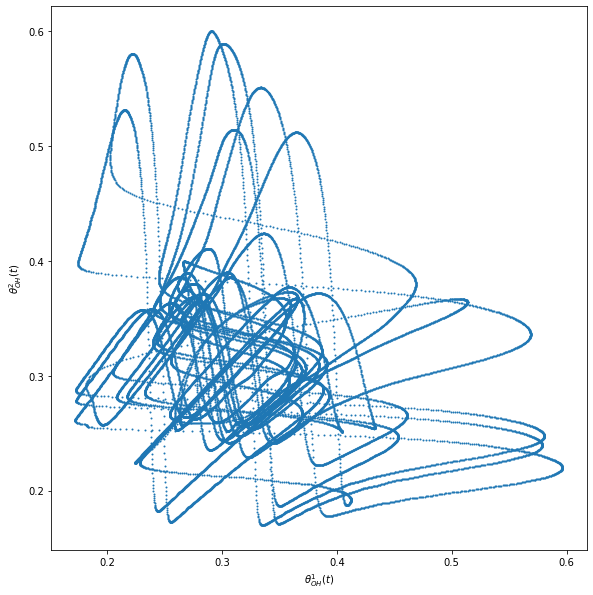

In [46]:
fig, ax  = plt.subplots(figsize=(10, 10))
ax.scatter(theta_OH_1, theta_OH_2, s=1)
ax.set_aspect('equal')
ax.set_xlabel(r'$\theta_{OH}^1(t)$')
ax.set_ylabel(r'$\theta_{OH}^2(t)$')
plt.savefig("figures/anticipation_sync_fig3.png", transparent=True, bbox_inches='tight')
plt.show()

In [47]:
dt = 1
max_integration_steps = 30000
time_points = np.linspace(0, max_integration_steps*dt, max_integration_steps+1)

init_states = [0.110, 0.110, 0.3, 0.3, 0.1175, 0.1175]
p, q, r, s, beta, omega_1, omega_2 = 2e-4, 1e-3, 2e-5, 9.7e-5, 5, 0.83, 0.88
epsilon = 12.3e-5
Y_1, Y_2, theta_OH_1, theta_OH_2, theta_O_1, theta_O_2 = simulate_bidirectionally_coupled_system(p, q, r, s, beta, omega_1, omega_2, epsilon, init_states, time_points)

### Figure 4

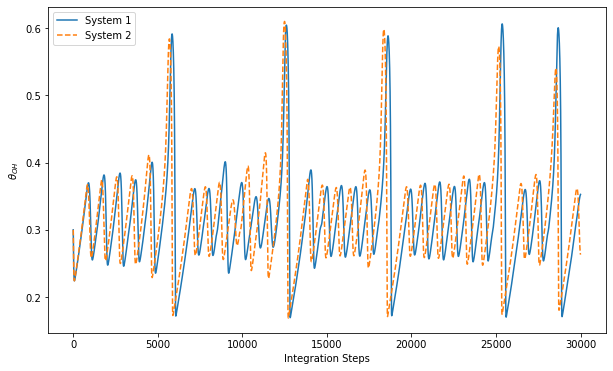

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(max_integration_steps+1), theta_OH_1, label="System 1")
ax.plot(np.arange(max_integration_steps+1), theta_OH_2, linestyle='--', label="System 2")
ax.set_xlabel('Integration Steps')
ax.set_ylabel(r'$\theta_{OH}$')
ax.legend()
plt.savefig("figures/anticipation_sync_fig4.png", transparent=True, bbox_inches='tight')
plt.show()

### Figure 5

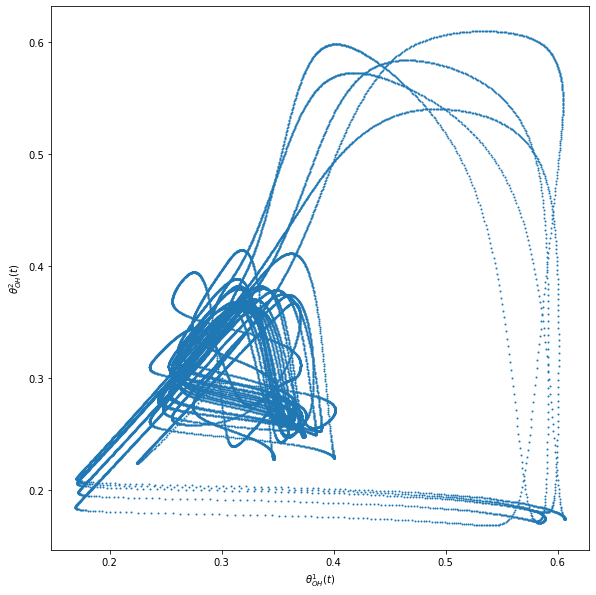

In [49]:
fig, ax  = plt.subplots(figsize=(10, 10))
ax.scatter(theta_OH_1, theta_OH_2, s=1)
ax.set_aspect('equal')
ax.set_xlabel(r'$\theta_{OH}^1(t)$')
ax.set_ylabel(r'$\theta_{OH}^2(t)$')
plt.savefig("figures/anticipation_sync_fig5.png", transparent=True, bbox_inches='tight')
plt.show()

In [50]:
dt = 1
max_integration_steps = 15000
time_points = np.linspace(0, max_integration_steps*dt, max_integration_steps+1)

init_states = [0.110, 0.110, 0.3, 0.3, 0.1175, 0.1175]
p, q, r, s, beta, omega_1, omega_2 = 2e-4, 1e-3, 2e-5, 9.7e-5, 5, 0.83, 0.88
epsilon = 5e-4
Y_1, Y_2, theta_OH_1, theta_OH_2, theta_O_1, theta_O_2 = simulate_bidirectionally_coupled_system(p, q, r, s, beta, omega_1, omega_2, epsilon, init_states, time_points)

### Figure 6

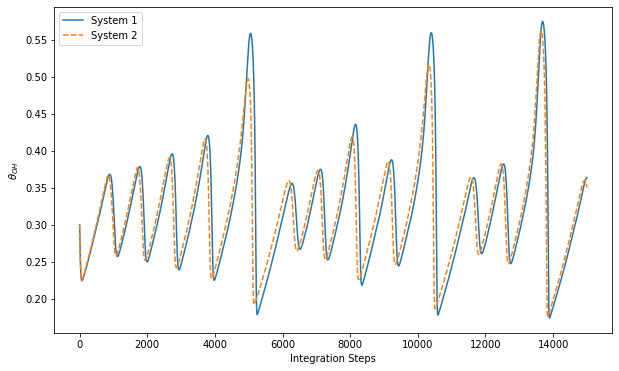

In [51]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(max_integration_steps+1), theta_OH_1, label="System 1")
ax.plot(np.arange(max_integration_steps+1), theta_OH_2, linestyle='--', label="System 2")
ax.set_xlabel('Integration Steps')
ax.set_ylabel(r'$\theta_{OH}$')
ax.legend()
plt.savefig("figures/anticipation_sync_fig6.png", transparent=True, bbox_inches='tight')
plt.show()

In [52]:
max_correlation = -1
best_delay = 0
start_offset = 0
for delay in range(1, 3000):
    correlation = np.corrcoef(theta_OH_1[start_offset+delay:], theta_OH_2[start_offset:-delay])[0, 1]
    if correlation > max_correlation:
        max_correlation = correlation
        best_delay = delay
print(f"Best Delay: {best_delay}")
print(f"Best Correlation: {max_correlation}")

Best Delay: 78
Best Correlation: 0.9823984125920922


### Figure 7

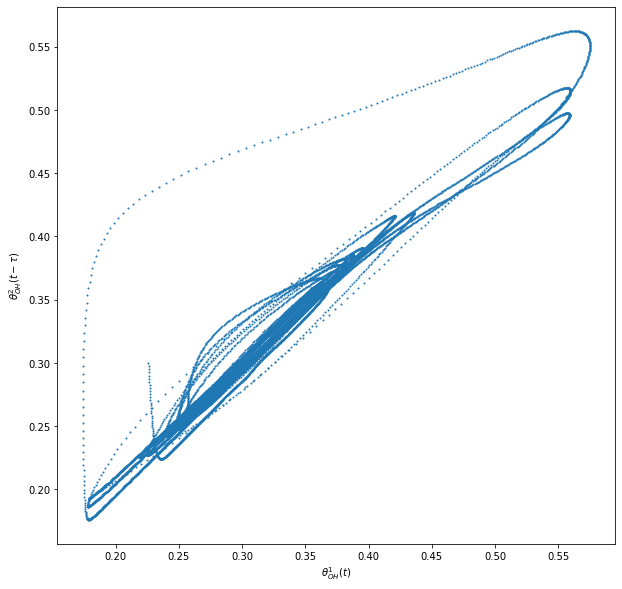

In [53]:
fig, ax  = plt.subplots(figsize=(10, 10))
start_offset = 0
delay = 92
ax.scatter(theta_OH_1[delay:], theta_OH_2[:-delay], s=1)
ax.set_aspect('equal')
ax.set_xlabel(r'$\theta_{OH}^1(t)$')
ax.set_ylabel(r'$\theta_{OH}^2(t-\tau)$')
plt.savefig("figures/anticipation_sync_fig7.png", transparent=True, bbox_inches='tight')
plt.show()

In [54]:
dt = 1
max_integration_steps = 30000
time_points = np.linspace(0, max_integration_steps*dt, max_integration_steps+1)

init_states = [0.110, 0.110, 0.3, 0.3, 0.1175, 0.1175]
p, q, r, s, beta, omega_1, omega_2 = 2e-4, 1e-3, 2e-5, 9.7e-5, 5, 0.83, 0.88
epsilon = 0.5
Y_1, Y_2, theta_OH_1, theta_OH_2, theta_O_1, theta_O_2 = simulate_bidirectionally_coupled_system(p, q, r, s, beta, omega_1, omega_2, epsilon, init_states, time_points)

### Figure 8

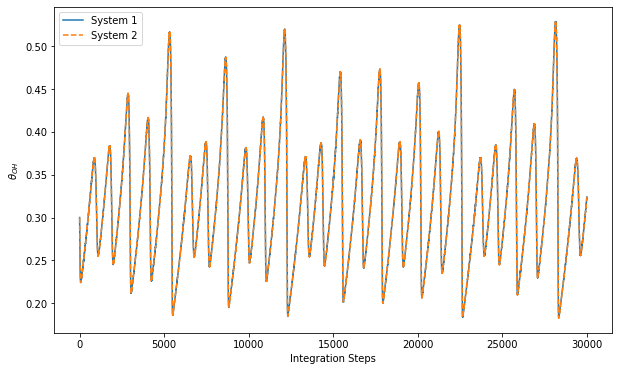

In [55]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(max_integration_steps+1), theta_OH_1, label="System 1")
ax.plot(np.arange(max_integration_steps+1), theta_OH_2, linestyle='--', label="System 2")
ax.set_xlabel('Integration Steps')
ax.set_ylabel(r'$\theta_{OH}$')
ax.legend()
plt.savefig("figures/anticipation_sync_fig8.png", transparent=True, bbox_inches='tight')
plt.show()

### Figure 9

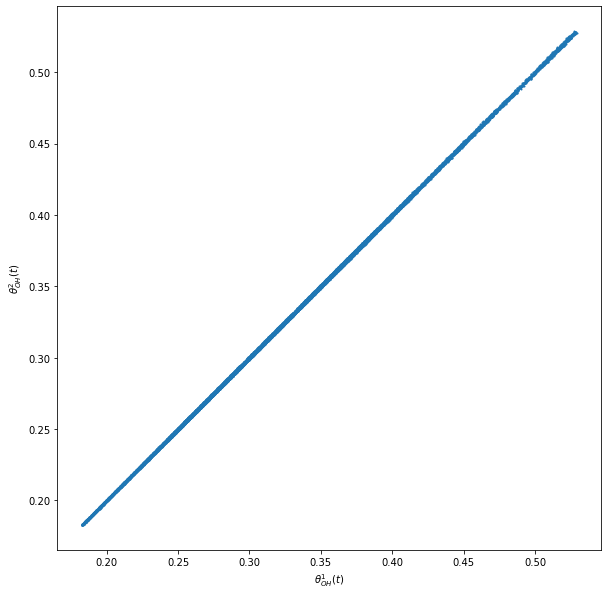

In [56]:
fig, ax  = plt.subplots(figsize=(10, 10))
ax.scatter(theta_OH_1, theta_OH_2, s=1)
ax.set_aspect('equal')
ax.set_xlabel(r'$\theta_{OH}^1(t)$')
ax.set_ylabel(r'$\theta_{OH}^2(t)$')
plt.savefig("figures/anticipation_sync_fig9.png", transparent=True, bbox_inches='tight')
plt.show()

In [61]:
def similarity(x1, x2, tau):
    if tau > 0:
        x1_t = x1[:-tau]
        x2_t_tau = x2[tau:]
    elif tau < 0:
        x1_t = x1[-tau:]
        x2_t_tau = x2[:tau]
    else:  # tau == 0
        x1_t = x1
        x2_t_tau = x2

    numerator = np.mean((x2_t_tau - x1_t) ** 2)
    denominator = np.sqrt(np.var(x1_t) * np.var(x2_t_tau))
    S_tau = np.sqrt(numerator / denominator)
    
    return S_tau


### Figure 10

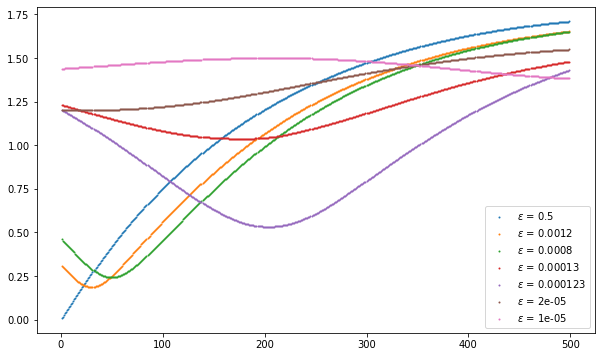

In [60]:
dt = 1
max_integration_steps = 30000
time_points = np.linspace(0, max_integration_steps*dt, max_integration_steps+1)

init_states = [0.110, 0.110, 0.3, 0.3, 0.1175, 0.1175]
p, q, r, s, beta, omega_1, omega_2 = 2e-4, 1e-3, 2e-5, 9.7e-5, 5, 0.83, 0.88
epsilons = [0.5, 12e-4, 8e-4, 13e-5, 12.3e-5, 2e-5, 1e-5]

fig, ax = plt.subplots(figsize=(10, 6))

for epsilon in epsilons:
    Y_1, Y_2, theta_OH_1, theta_OH_2, theta_O_1, theta_O_2 = simulate_bidirectionally_coupled_system(p, q, r, s, beta, omega_1, omega_2, epsilon, init_states, time_points)
    points = []
    for delay in range(1, 500):
        sim = similarity(theta_OH_1, theta_OH_2, -delay)
        points.append((delay, sim))
    ax.scatter(*zip(*points), label=f"$\epsilon$ = {epsilon}", s=1)

ax.legend()
plt.savefig("figures/anticipation_sync_fig10.png", transparent=True, bbox_inches='tight')
plt.show()

# Chaotic Synchronisation Under Unidirectional Coupling

In [21]:
def simulate_unidirectionally_coupled_system(p, q, r, s, beta, epsilon, tau_1, tau_2, init_states, time_points):
    """
    init_states = [Y_m, theta_OH_m, theta_O_m, Y_s, theta_OH_s, theta_O_s]
    """
    def unidirectionally_coupled_system(state, t, p, q, r, s, beta, epsilon, tau_1, tau_2):
        Y_m, theta_OH_m, theta_O_m, Y_s, theta_OH_s, theta_O_s = state(t)
        theta_OH_m = np.clip(theta_OH_m, 0, 1)
        theta_O_m = np.clip(theta_O_m, 0, 1)
        theta_OH_s = np.clip(theta_OH_s, 0, 1)
        theta_O_s = np.clip(theta_O_s, 0, 1)

        _, theta_OH_m_delayed, _, _, _, _ = state(t-tau_1)
        _, _, _, _, theta_OH_s_delayed, _ = state(t-tau_2)
        theta_OH_m_delayed = np.clip(theta_OH_m_delayed, 0, 1)
        theta_OH_s_delayed = np.clip(theta_OH_s_delayed, 0, 1)

        eps = 1e-8
        theta_M_m = 1 - theta_OH_m - theta_O_m + eps
        theta_M_s = 1 - theta_OH_s - theta_O_s + eps

        d_state = [
            p*theta_M_m - q*Y_m,
            Y_m*theta_M_m - (np.exp(-beta*theta_OH_m) + r)*theta_OH_m + 2*s*theta_O_m*theta_M_m,
            r*theta_OH_m - s*theta_O_m*theta_M_m,
            p*theta_M_s - q*Y_s,
            Y_s*theta_M_s - (np.exp(-beta*theta_OH_s) + r)*theta_OH_s + 2*s*theta_O_s*theta_M_s + epsilon*(theta_OH_m_delayed - theta_OH_s_delayed),
            r*theta_OH_s - s*theta_O_s*theta_M_s
        ]
        return np.array(d_state)
    
    sol = ddeint(unidirectionally_coupled_system, lambda t: init_states, time_points, fargs=(p, q, r, s, beta, epsilon, tau_1, tau_2))
    Y_m, theta_OH_m, theta_O_m, Y_s, theta_OH_s, theta_O_s = sol.T
    return Y_m, theta_OH_m, theta_O_m, Y_s, theta_OH_s, theta_O_s

## Lag Synchronisation Under Unidirectional Coupling

In [22]:
dt = 1
max_integration_steps = 30000
time_points = np.linspace(0, max_integration_steps*dt, max_integration_steps+1)

p, q, r, s, beta = 2e-4, 1e-3, 2e-5, 9.7e-5, 5
epsilon = 0.05
tau_1, tau_2 = 0, 0
init_states = [0.110, 0.3, 0.1175, 0.110, 0.3, 0.1175]
Y_m, theta_OH_m, theta_O_m, Y_s, theta_OH_s, theta_O_s =  simulate_unidirectionally_coupled_system(p, q, r, s, beta, epsilon, tau_1, tau_2, init_states, time_points)

### Figure 12

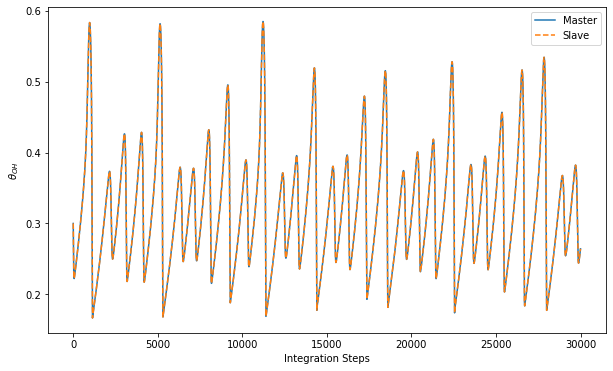

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(max_integration_steps+1), theta_OH_m, label="Master")
ax.plot(np.arange(max_integration_steps+1), theta_OH_s, linestyle='--', label="Slave")
ax.set_xlabel('Integration Steps')
ax.set_ylabel(r'$\theta_{OH}$')
ax.legend()
plt.savefig("figures/anticipation_sync_fig12.png", transparent=True, bbox_inches='tight')
plt.show()

### Figure 13

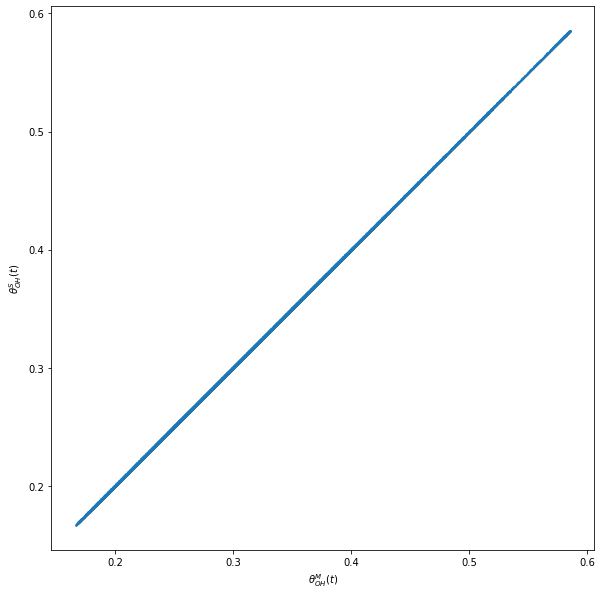

In [24]:
fig, ax  = plt.subplots(figsize=(10, 10))
ax.scatter(theta_OH_m, theta_OH_s, s=1)
ax.set_aspect('equal')
ax.set_xlabel(r'$\theta_{OH}^M(t)$')
ax.set_ylabel(r'$\theta_{OH}^S(t)$')
plt.savefig("figures/anticipation_sync_fig13.png", transparent=True, bbox_inches='tight')
plt.show()

In [25]:
dt = 1
max_integration_steps = 15000
time_points = np.linspace(0, max_integration_steps*dt, max_integration_steps+1)

p, q, r, s, beta = 2e-4, 1e-3, 2e-5, 9.7e-5, 5
epsilon = 0.05
tau_1, tau_2 = 1250, 0
init_states = [0.110, 0.3, 0.1175, 0.110, 0.3, 0.1175]
Y_m, theta_OH_m, theta_O_m, Y_s, theta_OH_s, theta_O_s =  simulate_unidirectionally_coupled_system(p, q, r, s, beta, epsilon, tau_1, tau_2, init_states, time_points)

### Figure 14

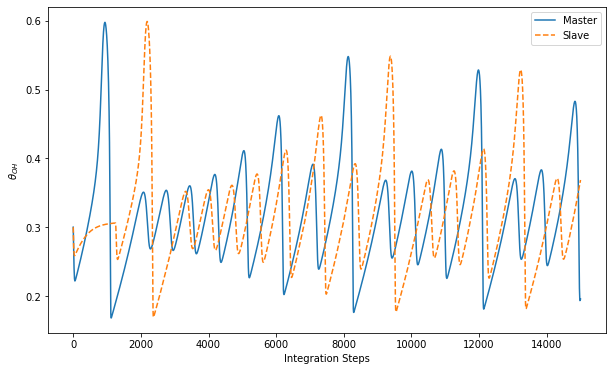

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(max_integration_steps+1), theta_OH_m, label="Master")
ax.plot(np.arange(max_integration_steps+1), theta_OH_s, linestyle='--', label="Slave")
ax.set_xlabel('Integration Steps')
ax.set_ylabel(r'$\theta_{OH}$')
ax.legend()
plt.savefig("figures/anticipation_sync_fig14.png", transparent=True, bbox_inches='tight')
plt.show()

In [27]:
max_correlation = -1
best_delay = 0
start_offset = 1000
for delay in range(1, 3000):
    correlation = np.corrcoef(theta_OH_m[start_offset:-delay], theta_OH_s[start_offset+delay:])[0, 1]
    if correlation > max_correlation:
        max_correlation = correlation
        best_delay = delay
print(f"Best Delay: {best_delay}")
print(f"Best Correlation: {max_correlation}")

Best Delay: 1249
Best Correlation: 0.9999808173953495


### Figure 15

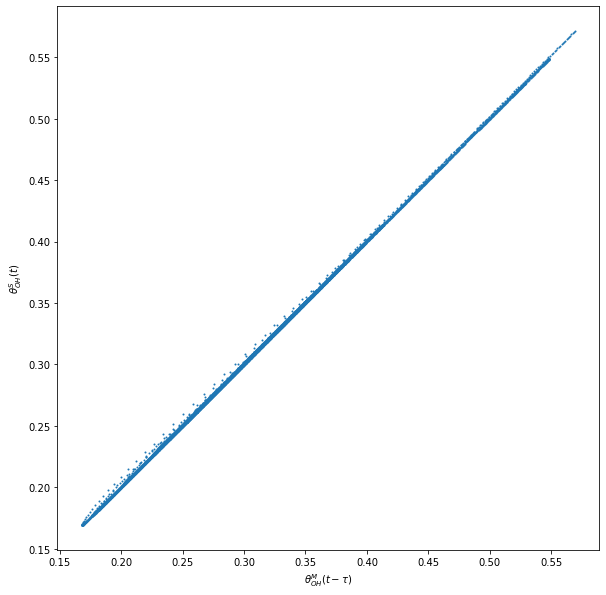

In [28]:
fig, ax  = plt.subplots(figsize=(10, 10))
start_offset = 1000
delay = 1248
ax.scatter(theta_OH_m[start_offset:-delay], theta_OH_s[start_offset+delay:], s=1)
ax.set_aspect('equal')
ax.set_xlabel(r'$\theta_{OH}^M(t-\tau)$')
ax.set_ylabel(r'$\theta_{OH}^S(t)$')
plt.savefig("figures/anticipation_sync_fig15.png", transparent=True, bbox_inches='tight')
plt.show()

## Anticipation Synchronisation Under Unidirectional Coupling

In [29]:
dt = 1
max_integration_steps = 15000
time_points = np.linspace(0, max_integration_steps*dt, max_integration_steps+1)

p, q, r, s, beta = 2e-4, 1e-3, 2e-5, 9.7e-5, 5
epsilon = 0.02
tau_1, tau_2 = 0, 64
init_states = [0.110, 0.3, 0.1175, 0.110, 0.3, 0.1175]
Y_m, theta_OH_m, theta_O_m, Y_s, theta_OH_s, theta_O_s =  simulate_unidirectionally_coupled_system(p, q, r, s, beta, epsilon, tau_1, tau_2, init_states, time_points)

### Figure 16

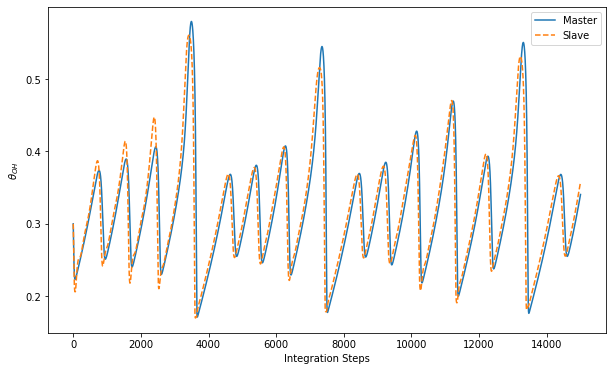

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(max_integration_steps+1), theta_OH_m, label="Master")
ax.plot(np.arange(max_integration_steps+1), theta_OH_s, linestyle='--', label="Slave")
ax.set_xlabel('Integration Steps')
ax.set_ylabel(r'$\theta_{OH}$')
ax.legend()
plt.savefig("figures/anticipation_sync_fig16.png", transparent=True, bbox_inches='tight')
plt.show()

In [31]:
def simulate_unidirectionally_coupled_systems_chain(chain_length, p, q, r, s, beta, epsilon, tau_1, tau_2, init_states, time_points):
    """
    init_states = [Y, theta_OH, theta_O] * chain_length
    """
    def unidirectionally_coupled_systems_chain(state, t, p, q, r, s, beta, epsilon, tau_1, tau_2):
        eps = 1e-8
        Y, theta_OH, theta_O = state(t)[:3]
        theta_OH = np.clip(theta_OH, 0, 1)
        theta_O = np.clip(theta_O, 0, 1)
        theta_M = 1 - theta_OH - theta_O + eps
        d_state = [
            p*theta_M - q*Y,
            Y*theta_M - (np.exp(-beta*theta_OH) + r)*theta_OH + 2*s*theta_O*theta_M,
            r*theta_OH - s*theta_O*theta_M
        ]

        chain_length = len(init_states) // 3
        for idx in range(1, chain_length):
            Y_s, theta_OH_s, theta_O_s = state(t)[idx*3 : (idx+1)*3]
            theta_OH_s = np.clip(theta_OH_s, 0, 1)
            theta_O_s = np.clip(theta_O_s, 0, 1)
            _, theta_OH_m_delayed, _ = state(t-tau_1)[(idx-1)*3 : idx*3]
            _, theta_OH_s_delayed, _ = state(t-tau_2)[idx*3 : (idx+1)*3]
            theta_OH_m_delayed = np.clip(theta_OH_m_delayed, 0, 1)
            theta_OH_s_delayed = np.clip(theta_OH_s_delayed, 0, 1)
            theta_M_s = 1 - theta_OH_s - theta_O_s + eps
            d_state += [
                p*theta_M_s - q*Y_s,
                Y_s*theta_M_s - (np.exp(-beta*theta_OH_s) + r)*theta_OH_s + 2*s*theta_O_s*theta_M_s + epsilon*(theta_OH_m_delayed - theta_OH_s_delayed),
                r*theta_OH_s - s*theta_O_s*theta_M_s
            ]
        return np.array(d_state)
    
    sol = ddeint(unidirectionally_coupled_systems_chain, lambda t: init_states, time_points, fargs=(p, q, r, s, beta, epsilon, tau_1, tau_2))
    Ys, theta_OHs, theta_Os = [], [], []

    for idx in range(chain_length):
        Y, theta_OH, theta_O = sol.T[idx*3 : (idx+1)*3]
        Ys.append(Y)
        theta_OHs.append(theta_OH)
        theta_Os.append(theta_O)
    return Ys, theta_OHs, theta_Os

In [32]:
dt = 1
max_integration_steps = 15000
time_points = np.linspace(0, max_integration_steps*dt, max_integration_steps+1)

p, q, r, s, beta = 2e-4, 1e-3, 2e-5, 9.7e-5, 5
epsilon = 0.02
tau_1, tau_2 = 0, 50
chain_length = 26
init_states = [0.110, 0.3, 0.1175] * chain_length
Ys, theta_OHs, theta_Os =  simulate_unidirectionally_coupled_systems_chain(chain_length, p, q, r, s, beta, epsilon, tau_1, tau_2, init_states, time_points)

### Figure 17

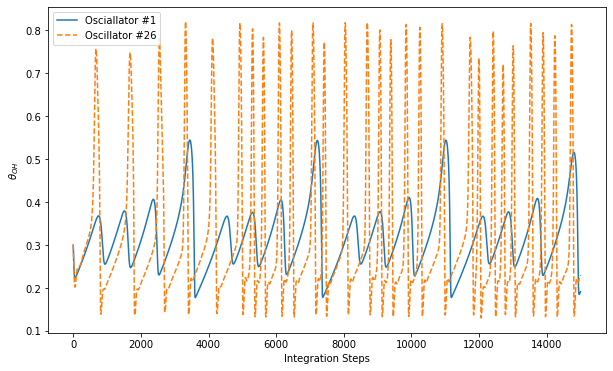

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(max_integration_steps+1), theta_OHs[0], label="Osciallator #1")
ax.plot(np.arange(max_integration_steps+1), theta_OHs[-1], linestyle='--', label=f"Oscillator #{chain_length}")
ax.set_xlabel('Integration Steps')
ax.set_ylabel(r'$\theta_{OH}$')
ax.legend()
plt.savefig("figures/anticipation_sync_fig17.png", transparent=True, bbox_inches='tight')
plt.show()

# Anticipation Synchronisation Using Oscillator Chains

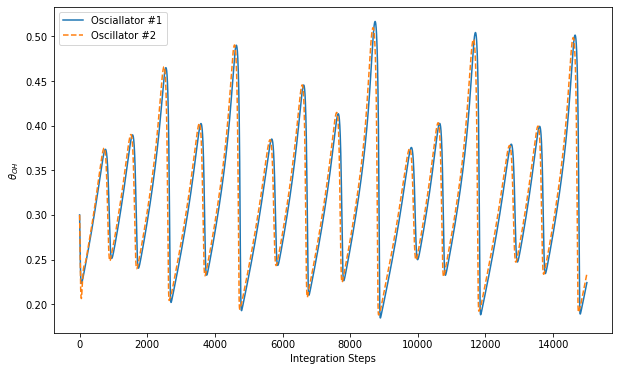

In [34]:
dt = 1
max_integration_steps = 15000
time_points = np.linspace(0, max_integration_steps*dt, max_integration_steps+1)

p, q, r, s, beta = 2e-4, 1e-3, 2e-5, 9.7e-5, 5
epsilon = 0.02
tau_1, tau_2 = 0, 50
chain_length = 2
init_states = [0.110, 0.3, 0.1175] * chain_length
Ys, theta_OHs, theta_Os =  simulate_unidirectionally_coupled_systems_chain(chain_length, p, q, r, s, beta, epsilon, tau_1, tau_2, init_states, time_points)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(max_integration_steps+1), theta_OHs[0], label="Osciallator #1")
ax.plot(np.arange(max_integration_steps+1), theta_OHs[-1], linestyle='--', label=f"Oscillator #{chain_length}")
ax.set_xlabel('Integration Steps')
ax.set_ylabel(r'$\theta_{OH}$')
ax.legend()
plt.savefig("figures/anticipation_sync_chain_len_2.png", transparent=True, bbox_inches='tight')
plt.show()

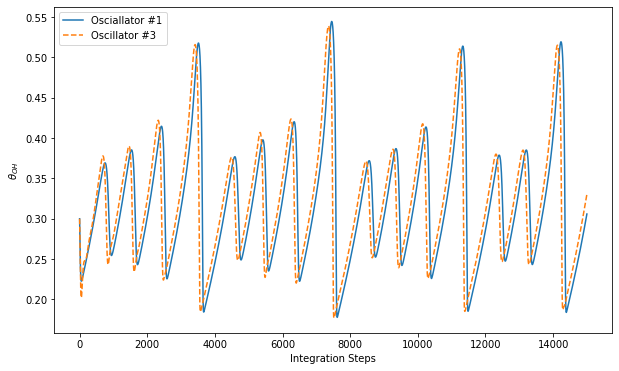

In [35]:
dt = 1
max_integration_steps = 15000
time_points = np.linspace(0, max_integration_steps*dt, max_integration_steps+1)

p, q, r, s, beta = 2e-4, 1e-3, 2e-5, 9.7e-5, 5
epsilon = 0.02
tau_1, tau_2 = 0, 50
chain_length = 3
init_states = [0.110, 0.3, 0.1175] * chain_length
Ys, theta_OHs, theta_Os =  simulate_unidirectionally_coupled_systems_chain(chain_length, p, q, r, s, beta, epsilon, tau_1, tau_2, init_states, time_points)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(max_integration_steps+1), theta_OHs[0], label="Osciallator #1")
ax.plot(np.arange(max_integration_steps+1), theta_OHs[-1], linestyle='--', label=f"Oscillator #{chain_length}")
ax.set_xlabel('Integration Steps')
ax.set_ylabel(r'$\theta_{OH}$')
ax.legend()
plt.savefig("figures/anticipation_sync_chain_len_3.png", transparent=True, bbox_inches='tight')
plt.show()

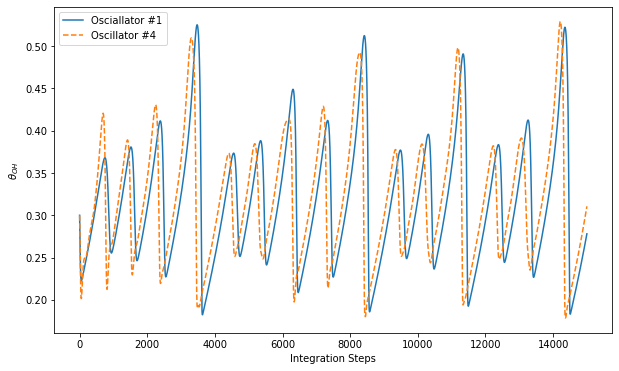

In [36]:
dt = 1
max_integration_steps = 15000
time_points = np.linspace(0, max_integration_steps*dt, max_integration_steps+1)

p, q, r, s, beta = 2e-4, 1e-3, 2e-5, 9.7e-5, 5
epsilon = 0.02
tau_1, tau_2 = 0, 50
chain_length = 4
init_states = [0.110, 0.3, 0.1175] * chain_length
Ys, theta_OHs, theta_Os =  simulate_unidirectionally_coupled_systems_chain(chain_length, p, q, r, s, beta, epsilon, tau_1, tau_2, init_states, time_points)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(max_integration_steps+1), theta_OHs[0], label="Osciallator #1")
ax.plot(np.arange(max_integration_steps+1), theta_OHs[-1], linestyle='--', label=f"Oscillator #{chain_length}")
ax.set_xlabel('Integration Steps')
ax.set_ylabel(r'$\theta_{OH}$')
ax.legend()
plt.savefig("figures/anticipation_sync_chain_len_4.png", transparent=True, bbox_inches='tight')
plt.show()

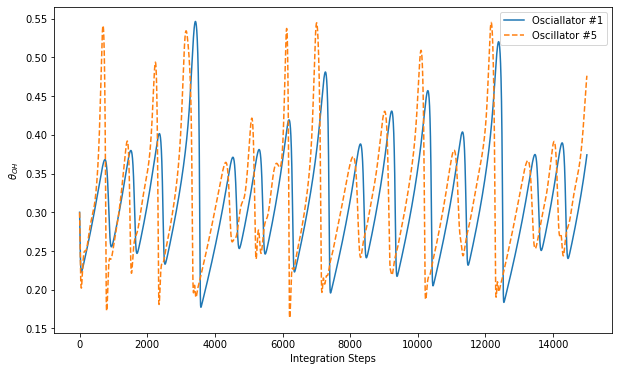

In [37]:
dt = 1
max_integration_steps = 15000
time_points = np.linspace(0, max_integration_steps*dt, max_integration_steps+1)

p, q, r, s, beta = 2e-4, 1e-3, 2e-5, 9.7e-5, 5
epsilon = 0.02
tau_1, tau_2 = 0, 50
chain_length = 5
init_states = [0.110, 0.3, 0.1175] * chain_length
Ys, theta_OHs, theta_Os =  simulate_unidirectionally_coupled_systems_chain(chain_length, p, q, r, s, beta, epsilon, tau_1, tau_2, init_states, time_points)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(max_integration_steps+1), theta_OHs[0], label="Osciallator #1")
ax.plot(np.arange(max_integration_steps+1), theta_OHs[-1], linestyle='--', label=f"Oscillator #{chain_length}")
ax.set_xlabel('Integration Steps')
ax.set_ylabel(r'$\theta_{OH}$')
ax.legend()
plt.savefig("figures/anticipation_sync_chain_len_5.png", transparent=True, bbox_inches='tight')
plt.show()